In [1]:
import pickle
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
with open('./data_for_plot.pk', 'rb') as fin:
    data_for_plot = pickle.load(fin)

In [3]:
data_for_plot.keys()

dict_keys(['bart_intrinsic', 'bart_xsum', 'bart_cnn', 'bart_xsum_last_layer', 'bart_nyt', 'bart_xsum_adapter', 'pegasus_intrinsic', 'pegasus_xsum'])

In [4]:
countries = list(data_for_plot['bart_intrinsic'].keys())

In [5]:
countries

['USA',
 'Cuba',
 'Brazil',
 'Germany',
 'France',
 'Great Britain',
 'Finland',
 'Japan',
 'China',
 'Korea',
 'Vietnam',
 'Kenya',
 'Nigeria',
 'Tanzania']

In [6]:
continent_map = {
     'USA': 'Americas',
     'Cuba': 'Americas',
     'Brazil': 'Americas',
     'Germany': 'Europe',
     'France': 'Europe',
     'Great Britain': 'Europe',
     'Finland': 'Europe',
     'Japan': 'Asia',
     'China': 'Asia',
     'Korea': 'Asia',
     'Vietnam': 'Asia',
     'Kenya': 'Africa',
     'Nigeria': 'Africa',
     'Tanzania': 'Africa',
}

In [7]:
bart_int = [data_for_plot['bart_intrinsic'][country] for country in countries]
bart_ext = [data_for_plot['bart_xsum'][country] for country in countries]

In [8]:
spearmanr(bart_ext, bart_int)

SpearmanrResult(correlation=0.8044941061072657, pvalue=0.0005214342603503607)

In [9]:
data = []

In [10]:
for country in countries:
    data.append(['BART-XSum', data_for_plot['bart_intrinsic'][country], 
                 data_for_plot['bart_xsum'][country], continent_map[country]])

In [11]:
df = pd.DataFrame(data, columns=['model', 'distributional prior', 'hallucination rate', 'continent'])

/home/faisal/miniconda3/envs/pytroch_latest/lib/python3.7/site-packages/seaborn-0.11.1-py3.7.egg/seaborn/axisgrid.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.fig.tight_layout(*args, **kwargs)
/home/faisal/miniconda3/envs/pytroch_latest/lib/python3.7/site-packages/seaborn-0.11.1-py3.7.egg/seaborn/axisgrid.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.fig.tight_layout(*args, **kwargs)


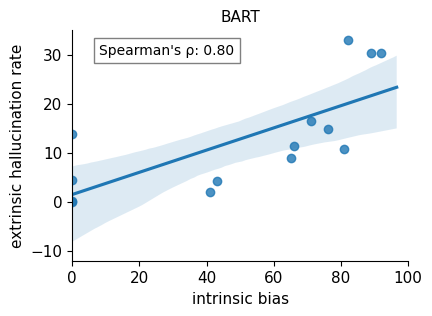

In [12]:
g = sns.FacetGrid(df, col="model", sharey=False, gridspec_kws={"wspace":0.27}, aspect=1.3)
# sns.set(font_scale=1.3)
g.map(sns.regplot, "distributional prior", "hallucination rate", truncate=False)
for i,ax in enumerate(g.axes[0]):
    ax.set_xlim(0,100)
    ax.set_xlabel("intrinsic bias", fontsize=11)
    if i==0:
        ax.set_ylabel("extrinsic hallucination rate", fontsize=11)
    else:
        ax.set_ylabel("")
    ax.set_title(ax.get_title(), fontsize=11)
    for tick in ax.get_xticklabels():
        tick.set_fontsize(11)
    for tick in ax.get_yticklabels():
        tick.set_fontsize(11)
g.axes[0][0].set_title("BART", fontsize=11)
g.axes[0][0].text(8, 30, "Spearman's ρ: 0.80", color='black', bbox=dict(facecolor='none', edgecolor='grey'))
g.add_legend()

In [13]:
peg_int = [data_for_plot['pegasus_intrinsic'][country] for country in countries]
peg_ext = [data_for_plot['pegasus_xsum'][country] for country in countries]

In [14]:
spearmanr(peg_ext, peg_int)

SpearmanrResult(correlation=0.8118816794056289, pvalue=0.0004209742347354824)

In [15]:
data = []

In [16]:
for country in countries:
    data.append(['PEGASUS-XSum', data_for_plot['pegasus_intrinsic'][country], 
                 data_for_plot['pegasus_xsum'][country], continent_map[country]])

In [17]:
df = pd.DataFrame(data, columns=['model', 'distributional prior', 'hallucination rate', 'continent'])

/home/faisal/miniconda3/envs/pytroch_latest/lib/python3.7/site-packages/seaborn-0.11.1-py3.7.egg/seaborn/axisgrid.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.fig.tight_layout(*args, **kwargs)
/home/faisal/miniconda3/envs/pytroch_latest/lib/python3.7/site-packages/seaborn-0.11.1-py3.7.egg/seaborn/axisgrid.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.fig.tight_layout(*args, **kwargs)


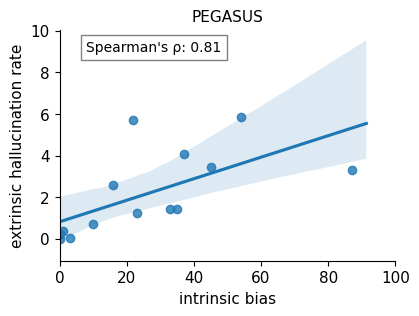

In [18]:
g = sns.FacetGrid(df, col="model", sharey=False, gridspec_kws={"wspace":0.27}, aspect=1.3)
# sns.set(font_scale=1.3)
g.map(sns.regplot, "distributional prior", "hallucination rate", truncate=False)
for i,ax in enumerate(g.axes[0]):
    ax.set_xlim(0,100)
    ax.set_xlabel("intrinsic bias", fontsize=11)
    if i==0:
        ax.set_ylabel("extrinsic hallucination rate", fontsize=11)
    else:
        ax.set_ylabel("")
    ax.set_title(ax.get_title(), fontsize=11)
    for tick in ax.get_xticklabels():
        tick.set_fontsize(11)
    for tick in ax.get_yticklabels():
        tick.set_fontsize(11)
g.axes[0][0].set_title("PEGASUS", fontsize=11)
g.axes[0][0].text(8, 9, "Spearman's ρ: 0.81", color='black', bbox=dict(facecolor='none', edgecolor='grey'))
g.add_legend()

In [19]:
nyt_ext = [data_for_plot['bart_nyt'][country] for country in countries]
cnn_ext = [data_for_plot['bart_cnn'][country] for country in countries]

In [20]:
spearmanr(nyt_ext, bart_int)

SpearmanrResult(correlation=0.9410927667895489, pvalue=5.309332872540776e-07)

In [21]:
spearmanr(cnn_ext, bart_int)

SpearmanrResult(correlation=0.9077206828608416, pvalue=7.288706933636295e-06)

In [22]:
data = []

In [23]:
for country in countries:
    data.append(['BART-CNN', data_for_plot['bart_intrinsic'][country], 
                 data_for_plot['bart_cnn'][country], continent_map[country]])

In [24]:
for country in countries:
    data.append(['BART-NYT', data_for_plot['bart_intrinsic'][country], 
                 data_for_plot['bart_nyt'][country], continent_map[country]])

In [25]:
df = pd.DataFrame(data, columns=['model', 'distributional prior', 'hallucination rate', 'continent'])

/home/faisal/miniconda3/envs/pytroch_latest/lib/python3.7/site-packages/seaborn-0.11.1-py3.7.egg/seaborn/axisgrid.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.fig.tight_layout(*args, **kwargs)
/home/faisal/miniconda3/envs/pytroch_latest/lib/python3.7/site-packages/seaborn-0.11.1-py3.7.egg/seaborn/axisgrid.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.fig.tight_layout(*args, **kwargs)


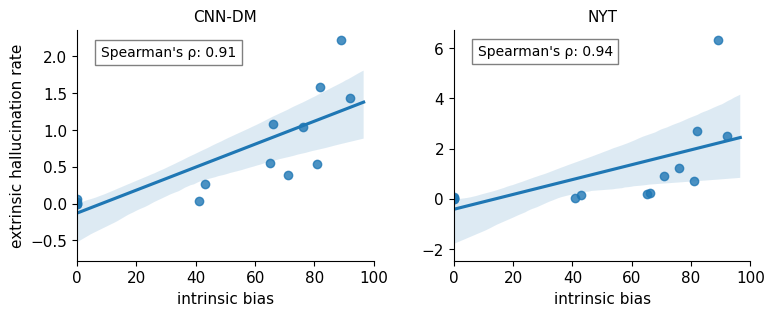

In [26]:
g = sns.FacetGrid(df, col="model", sharey=False, gridspec_kws={"wspace":0.27}, aspect=1.3)
# sns.set(font_scale=1.3)
g.map(sns.regplot, "distributional prior", "hallucination rate", truncate=False)
for i,ax in enumerate(g.axes[0]):
    ax.set_xlim(0,100)
    ax.set_xlabel("intrinsic bias", fontsize=11)
    if i==0:
        ax.set_ylabel("extrinsic hallucination rate", fontsize=11)
    else:
        ax.set_ylabel("")
    ax.set_title(ax.get_title(), fontsize=11)
    for tick in ax.get_xticklabels():
        tick.set_fontsize(11)
    for tick in ax.get_yticklabels():
        tick.set_fontsize(11)
g.axes[0][0].set_title("CNN-DM", fontsize=11)
g.axes[0][0].text(8, 2.0, "Spearman's ρ: 0.91", color='black', bbox=dict(facecolor='none', edgecolor='grey'))
g.axes[0][1].set_title("NYT", fontsize=11)
g.axes[0][1].text(8, 5.7, "Spearman's ρ: 0.94", color='black', bbox=dict(facecolor='none', edgecolor='grey'))
g.add_legend()